In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
adv=pd.read_csv("advertising.csv")
housing =pd.read_csv("Housing.csv")
aviation=pd.read_csv("faa_ai_prelim.csv")

In [4]:
adv.info()
print('\n\n\n')
housing.info()
print('\n\n\n')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 

In [5]:
adv.sample(10)

,TV,Radio,Newspaper,Sales
3,151.5,41.3,58.5,16.5
65,69.0,9.3,0.9,11.3
131,265.2,2.9,43.0,17.7
121,18.8,21.7,50.4,7.0
22,13.2,15.9,49.6,5.6
40,202.5,22.3,31.6,16.6
123,123.1,34.6,12.4,15.2
165,234.5,3.4,84.8,16.9
24,62.3,12.6,18.3,9.7
35,290.7,4.1,8.5,17.8


In [6]:
housing.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
326,3990000,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished
313,4095000,3680,3,2,2,yes,no,no,no,no,0,no,semi-furnished
396,3500000,3640,2,1,1,yes,no,no,no,no,1,no,semi-furnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
381,3605000,4000,2,1,1,yes,no,no,no,no,0,yes,semi-furnished
284,4270000,7770,2,1,1,yes,no,no,no,no,1,no,furnished
85,6510000,8250,3,2,3,yes,no,no,no,yes,0,no,furnished
406,3465000,5320,2,1,1,yes,no,no,no,no,1,yes,unfurnished
219,4795000,7000,3,1,2,yes,no,yes,no,no,0,no,unfurnished
75,6650000,4260,4,2,2,yes,no,no,yes,no,0,no,semi-furnished


In [7]:
aviation.sample(10)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
60,No,10-FEB-16,09-FEB-16,11:30:00Z,WILLIAMSPORT,Pennsylvania,NaN,"AIRCRAFT ON APPROACH TO LAND, STRUCK TREES, LA...",Accident,FAA Harrisburg FSDO-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,No,16-FEB-16,16-FEB-16,02:00:00Z,SALINAS,California,NaN,"AIRCRAFT ON LANDING NOSE GEAR COLLAPSED, SALIN...",Incident,FAA San Jose FSDO-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,No,16-FEB-16,12-FEB-16,15:30:00Z,SHIRLEY,New York,NaN,"AIRCRAFT LANDED, STRUCK A SNOWBANK AND CAUGHT ...",Accident,FAA Farmingdale FSDO-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,No,16-FEB-16,15-FEB-16,13:00:00Z,WEST PALM BEACH,Florida,NaN,"AIRCRAFT ON TAXI, GEAR COLLAPSED, WEST PALM BE...",Incident,FAA Miami FSDO-19,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,No,12-FEB-16,11-FEB-16,20:43:00Z,WEATHERFORD,Texas,United States,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,Accident,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,No,17-FEB-16,17-FEB-16,11:05:00Z,DETROIT,Michigan,NaN,AMERICAN AIRLINES FLIGHT AAL1241 BOEING 737 AI...,Incident,FAA East Michigan FSDO-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,No,10-FEB-16,07-FEB-16,21:00:00Z,HELLS CANYON,Idaho,NaN,"AIRCRAFT ON LANDING GEAR COLLAPSED, HELLS CANY...",Incident,FAA Boise FSDO-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,19-FEB-16,18-FEB-16,20:23:00Z,PEARL HARBOR,Hawaii,NaN,N80918 BELL 206B ROTORCRAFT CRASHED INTO THE W...,Accident,FAA Honolulu FSDO-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd

def preprocess_dataset(df, target_col=None):
    # Drop target column if specified
    df_clean = df.drop(columns=[target_col], errors="ignore").copy()

    # Separate numeric & categorical
    num_cols = df_clean.select_dtypes(include=["number"]).columns
    cat_cols = df_clean.select_dtypes(exclude=["number"]).columns

    # Fill NaNs
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
    df_clean[cat_cols] = df_clean[cat_cols].fillna("Missing")

    # One-hot encode categoricals
    df_clean = pd.get_dummies(df_clean, drop_first=True)

    # Fill any leftover NaNs (safety step for aviation dataset)
    df_clean = df_clean.fillna(0)

    # Convert bools → int
    for col in df_clean.columns:
        if df_clean[col].dtype == "bool":
            df_clean[col] = df_clean[col].astype(int)

    return df_clean


# Apply preprocessing
adv_preprocessed = preprocess_dataset(adv, target_col="Sales")
housing_preprocessed = preprocess_dataset(housing, target_col="price")
aviation_preprocessed = preprocess_dataset(aviation)


print(adv_preprocessed.shape)
adv_preprocessed.sample(5)

(200, 3)


,TV,Radio,Newspaper
140,73.4,17.0,12.9
161,85.7,35.8,49.3
178,276.7,2.3,23.7
111,241.7,38.0,23.2
159,131.7,18.4,34.6


In [9]:
print(housing_preprocessed.shape)
housing_preprocessed.sample(5)

(545, 13)


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
468,2835,2,1,1,0,1,0,0,0,0,0,1,0
538,3649,2,1,1,0,1,0,0,0,0,0,0,1
494,6800,2,1,1,0,1,0,0,0,0,0,0,1
295,2325,3,1,2,0,0,0,0,0,0,0,1,0
372,3180,3,1,2,0,0,0,1,0,0,0,1,0


In [10]:
print(aviation_preprocessed.shape)
aviation_preprocessed.sample(5)

(83, 559)


,ACFT_MISSING_FLAG,FAR_PART,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CBN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,...,FLT_PHASE_Missing,FLT_PHASE_STANDING (STD),FLT_PHASE_TAKEOFF (TOF),FLT_PHASE_TAXI (TXI),FLT_PHASE_UNKNOWN (UNK),MAX_INJ_LVL_Minor,MAX_INJ_LVL_Missing,MAX_INJ_LVL_Serious,MAX_INJ_LVL_Unknown,FATAL_FLAG_Yes
58,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
44,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
62,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
67,0.0,91.0,2.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
20,0.0,91.0,1.0,1.333333,3.0,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
scaler= StandardScaler()
adv_scaled = scaler.fit_transform(adv_preprocessed)
housing_scaled = scaler.fit_transform(housing_preprocessed)
aviation_scaled = scaler.fit_transform(aviation_preprocessed)

In [12]:
def reconstruction_error(X, n_components_list):
    #mean
    mu=np.mean(X, axis=0)
    A= X - mu

    #covariance matrix
    C=np.dot(A.T, A)
    eigenvals, eigenvecs = np.linalg.eig(C)

    #sort eigenvalues and eigenvectors
    idx =np.argsort(eigenvals)[::-1]
    eigenvecs = eigenvecs[:, idx]

    error = []
    for n in n_components_list:
        E=eigenvecs[:, :n]
        W= np.dot(A, E) #projection
        R=np.dot(W, E.T) + mu #reconstruction
        err =np.sum((X-R)**2).real
        error.append(err)

    return error

In [13]:
n_list = [1, 2, 3, 5, 7, 10, 15]

adv_errors = reconstruction_error(adv_scaled, n_list)
housing_errors = reconstruction_error(housing_scaled, n_list)
aviation_errors = reconstruction_error(aviation_scaled, n_list)


In [14]:
for dataset, errors in [("Advertising", adv_errors),
                        ("Housing", housing_errors),
                        ("Aviation", aviation_errors)]:
    print(f"\n{dataset} Reconstruction Errors:")
    for n, err in zip(n_list, errors):
        print(f"  n={n}: error={err:.4f}")



Advertising Reconstruction Errors:
  n=1: error=325.8295
  n=2: error=129.1783
  n=3: error=0.0000
  n=5: error=0.0000
  n=7: error=0.0000
  n=10: error=0.0000
  n=15: error=0.0000

Housing Reconstruction Errors:
  n=1: error=5739.0350
  n=2: error=4881.8359
  n=3: error=4064.2974
  n=5: error=2777.8496
  n=7: error=1842.5814
  n=10: error=744.6106
  n=15: error=0.0000

Aviation Reconstruction Errors:
  n=1: error=43867.1970
  n=2: error=42899.0088
  n=3: error=42006.4766
  n=5: error=40323.2845
  n=7: error=38696.1580
  n=10: error=36420.0257
  n=15: error=32853.1366


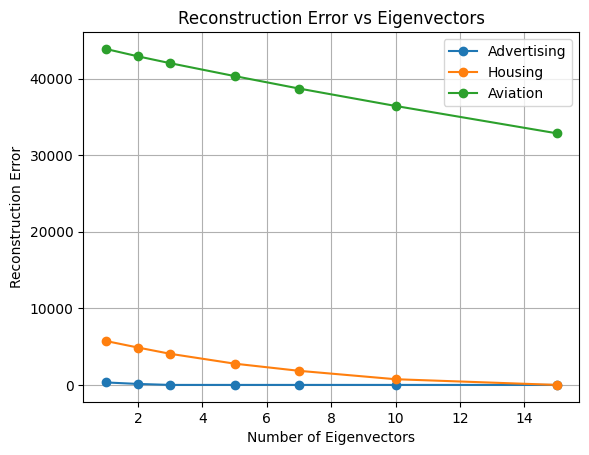

In [15]:
plt.plot(n_list, adv_errors, marker='o', label="Advertising")
plt.plot(n_list, housing_errors, marker='o', label="Housing")
plt.plot(n_list, aviation_errors, marker='o', label="Aviation")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid()
plt.title("Reconstruction Error vs Eigenvectors")
plt.show()
